# Microsoft Learn

## AutoML for Images to train and a deploy an image classification model (part 2)
Important: This feature is currently in public preview. This preview version is provided without a service-level agreement. Certain features might not be supported or might have constrained capabilities. For more information, see Supplemental Terms of Use for Microsoft Azure Previews.

Serge Retkowsky | serge.retkowsky@microsoft.com | V1 14-June-2022

In [1]:
import azureml.core
from azureml.core import Workspace, Dataset
from azureml.core.webservice import Webservice
import requests
import json
import matplotlib.pyplot as plt
import time
from IPython.display import Image
import datetime
import numpy as np
import cv2

In [2]:
ws = Workspace.from_config()
print("Azure ML workspace:", ws.name, "\nAzure ML resource group:", ws.resource_group)

Azure ML workspace: azuremlvision 
Azure ML resource group: azuremlvision-rg


In [3]:
print(datetime.datetime.today())

2022-06-14 14:47:00.374105


In [4]:
import sys
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

## AutoML for Images deployed model

In [5]:
service = Webservice(workspace = ws, name = 'flowersclassificationmodel')
#print(service.scoring_uri)
#print(service.swagger_uri)

In [6]:
primary, secondary = service.get_keys()

In [7]:
# URL for the web service
scoring_uri = service.scoring_uri
# If the service is authenticated, set the key or token
key = primary

## Function to call the deployed model

In [8]:
def flowers_model(test_image):
    
    t1 = time.time()
    
    print("\n\033[1;31;34mPredicting the image ...\n")
    print("Image file:", test_image, "\n")
    
    input_image = open(test_image, 'rb').read()
    headers = {'Content-Type': 'application/json'}
    headers['Authorization'] = f'Bearer {key}'
    resp = requests.post(scoring_uri, input_image, headers = headers)
    detections = json.loads(resp.text)
    print(detections)
    
    label_index = np.argmax(detections['probs'])
    label = detections['labels'][label_index]
    conf_score = detections['probs'][label_index]
    
    print("\n>> This flower is from the\033[1;31;91m", str.upper(label), 
          "\033[1;31;34mfamily with a confidence =", round(conf_score * 100, 2), "%")
    
    print("\033[0m")
    print("-" * 36)
    print("Response status code:", resp.status_code)
    print("Elapsed:", resp.elapsed)
    print("Full process done in", round(time.time() - t1, 6), "second")
    
    return label, conf_score

In [9]:
def labelled_image(image_file):
    
    %matplotlib inline
    img = cv2.imread(image_file)
    resized = cv2.resize(img, (640, 480))
    
    msg1 = label + " (" + str(round(conf_score, 4)) + ")"
    result = cv2.putText(resized, msg1, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    msg2 = "Powered with Azure ML"
    cv2.putText(result, msg2, (350, 450), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2, cv2.LINE_AA)
    
    plt.figure(figsize = (15, 8))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    
    output_file =  TEST_DIR + '/predicted_' + os.path.basename(test_image)
    cv2.imwrite(output_file, result)
    print("Image saved in:", output_file)

## Testing the model

In [10]:
IMAGES_DIR = 'flowers-images'
TEST_DIR = IMAGES_DIR + '/test'

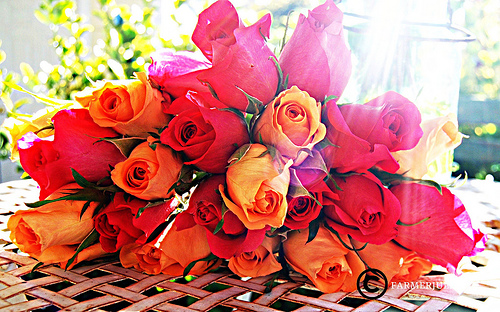

In [11]:
test_image = TEST_DIR + '/test (1).jpg'

from IPython.display import Image
Image(filename = test_image, width = 640, height = 480)

In [12]:
label, conf_score = flowers_model(test_image)


Predicting the image ...

Image file: flowers-images/test/test (1).jpg 

{'filename': '/tmp/tmpfv4xkd2s/tmpgkj8zmwa', 'probs': [0.0005343324155546725, 0.00020883162505924702, 0.9914088845252991, 0.0038917118217796087, 0.003956255502998829], 'labels': ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']}

>> This flower is from the ROSES family with a confidence = 99.14 %

------------------------------------
Response status code: 200
Elapsed: 0:00:00.196504
Full process done in 0.240349 second


In [13]:
label, conf_score

('roses', 0.9914088845252991)

Image saved in: flowers-images/test/predicted_test (1).jpg


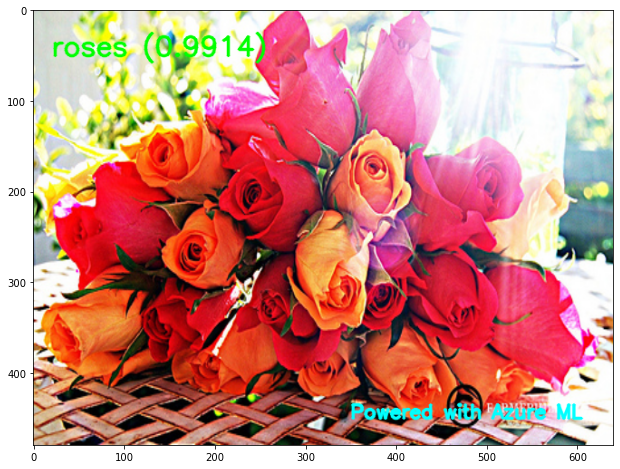

In [14]:
labelled_image(test_image)

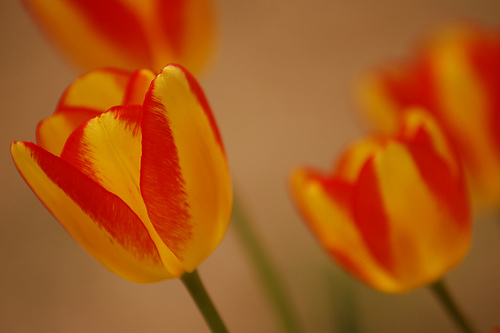

In [15]:
test_image = TEST_DIR + '/test (2).jpg'

from IPython.display import Image
Image(filename = test_image, width = 640, height = 480)

In [16]:
label, conf_score = flowers_model(test_image)


Predicting the image ...

Image file: flowers-images/test/test (2).jpg 

{'filename': '/tmp/tmptonakctd/tmpzp2mh6do', 'probs': [0.00017300763283856213, 0.0001016714159050025, 0.0009644962847232819, 0.0002166558988392353, 0.9985442161560059], 'labels': ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']}

>> This flower is from the TULIPS family with a confidence = 99.85 %

------------------------------------
Response status code: 200
Elapsed: 0:00:00.149064
Full process done in 0.17972 second


In [17]:
label, conf_score

('tulips', 0.9985442161560059)

Image saved in: flowers-images/test/predicted_test (2).jpg


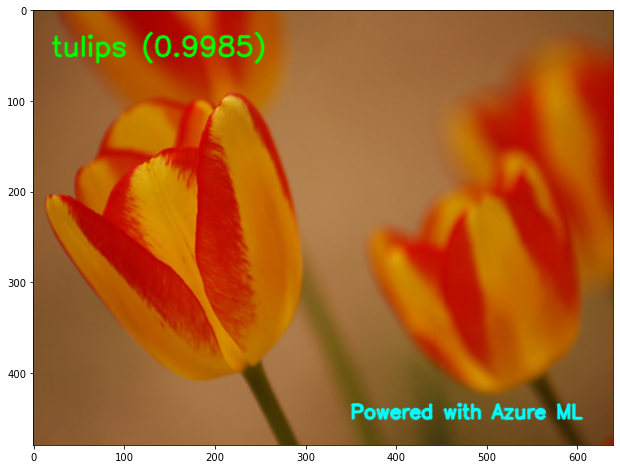

In [18]:
labelled_image(test_image)

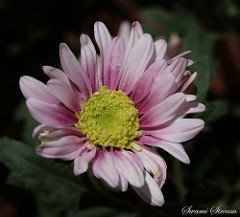

In [19]:
test_image = TEST_DIR + '/test (3).jpg'

from IPython.display import Image
Image(filename = test_image, width = 640, height = 480)

In [20]:
label, conf_score = flowers_model(test_image)


Predicting the image ...

Image file: flowers-images/test/test (3).jpg 

{'filename': '/tmp/tmpihnppw2b/tmpnkhmbwyr', 'probs': [0.9969894289970398, 0.0010763126192614436, 0.0005750993732362986, 0.0011687279911711812, 0.00019034378055948764], 'labels': ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']}

>> This flower is from the DAISY family with a confidence = 99.7 %

------------------------------------
Response status code: 200
Elapsed: 0:00:00.140646
Full process done in 0.167267 second


In [21]:
label, conf_score

('daisy', 0.9969894289970398)

Image saved in: flowers-images/test/predicted_test (3).jpg


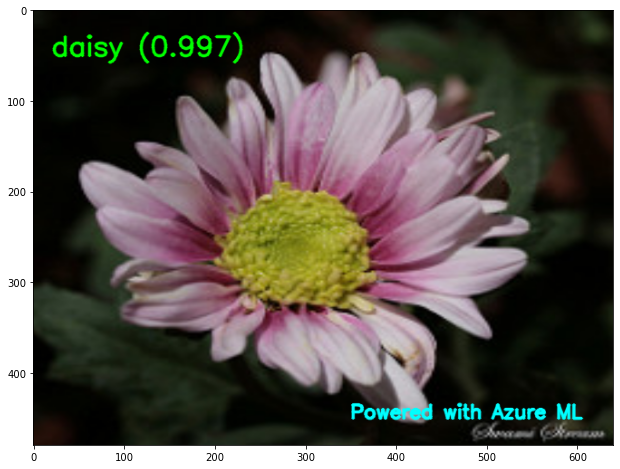

In [22]:
labelled_image(test_image)

## We can download an image from the web

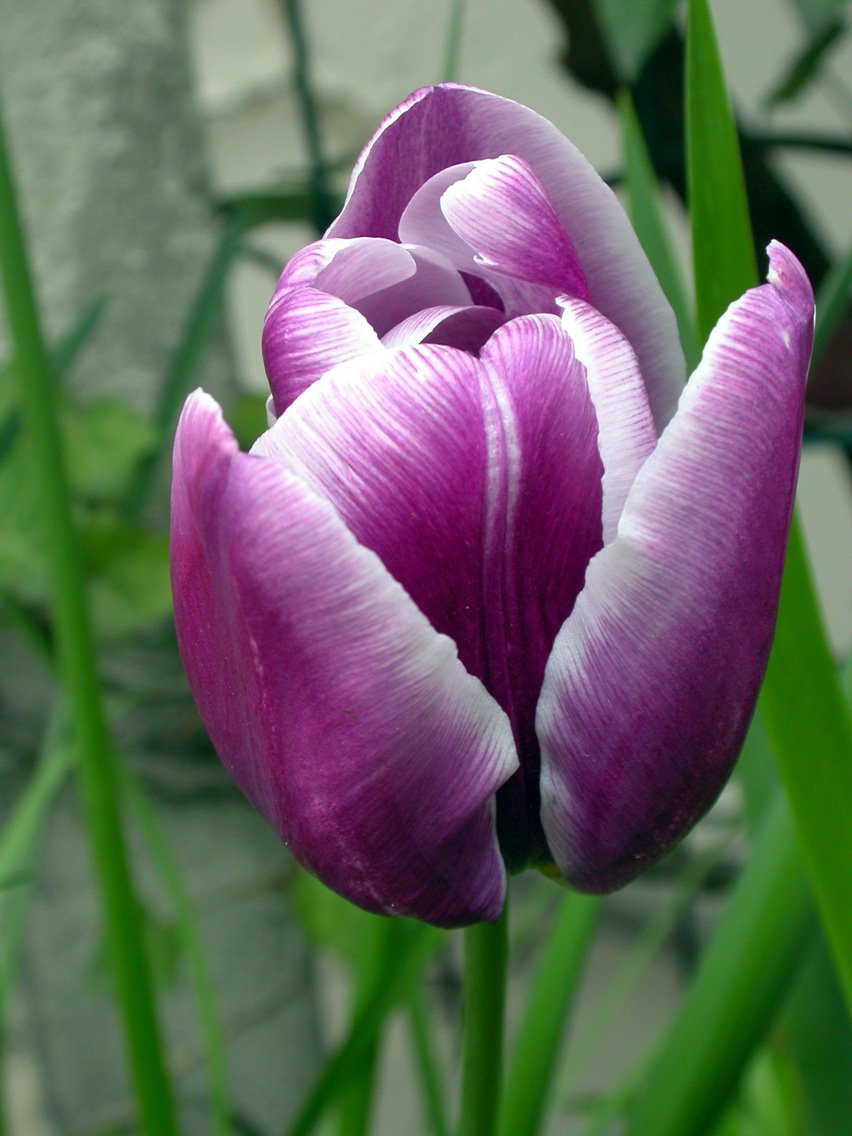

In [23]:
url = "https://images.freeimages.com/images/large-previews/f1b/tulipe-01-1496573.jpg"

print("Downloading image from:", url)
urlfile = requests.get(url, allow_redirects = True)
savedimage = 'flowers-images/test/download.jpg'
open(savedimage, 'wb').write(urlfile.content)

from IPython.display import Image
Image(filename = savedimage, width = 640, height = 480)

In [24]:
label, conf_score = flowers_model(savedimage)


Predicting the image ...

Image file: flowers-images/test/download.jpg 

{'filename': '/tmp/tmpqucrh0p2/tmpb866xoct', 'probs': [0.00017390726134181023, 4.8630605306243524e-05, 0.0025524392258375883, 0.00034665531711652875, 0.9968785047531128], 'labels': ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']}

>> This flower is from the TULIPS family with a confidence = 99.69 %

------------------------------------
Response status code: 200
Elapsed: 0:00:00.170619
Full process done in 0.198792 second


In [25]:
label, conf_score

('tulips', 0.9968785047531128)

Image saved in: flowers-images/test/predicted_test (3).jpg


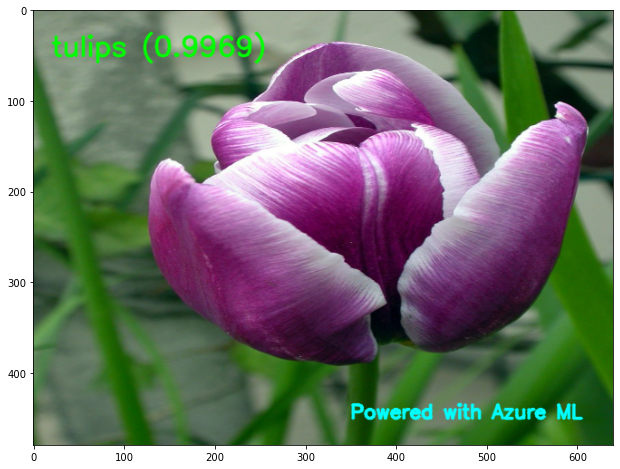

In [26]:
labelled_image(savedimage)

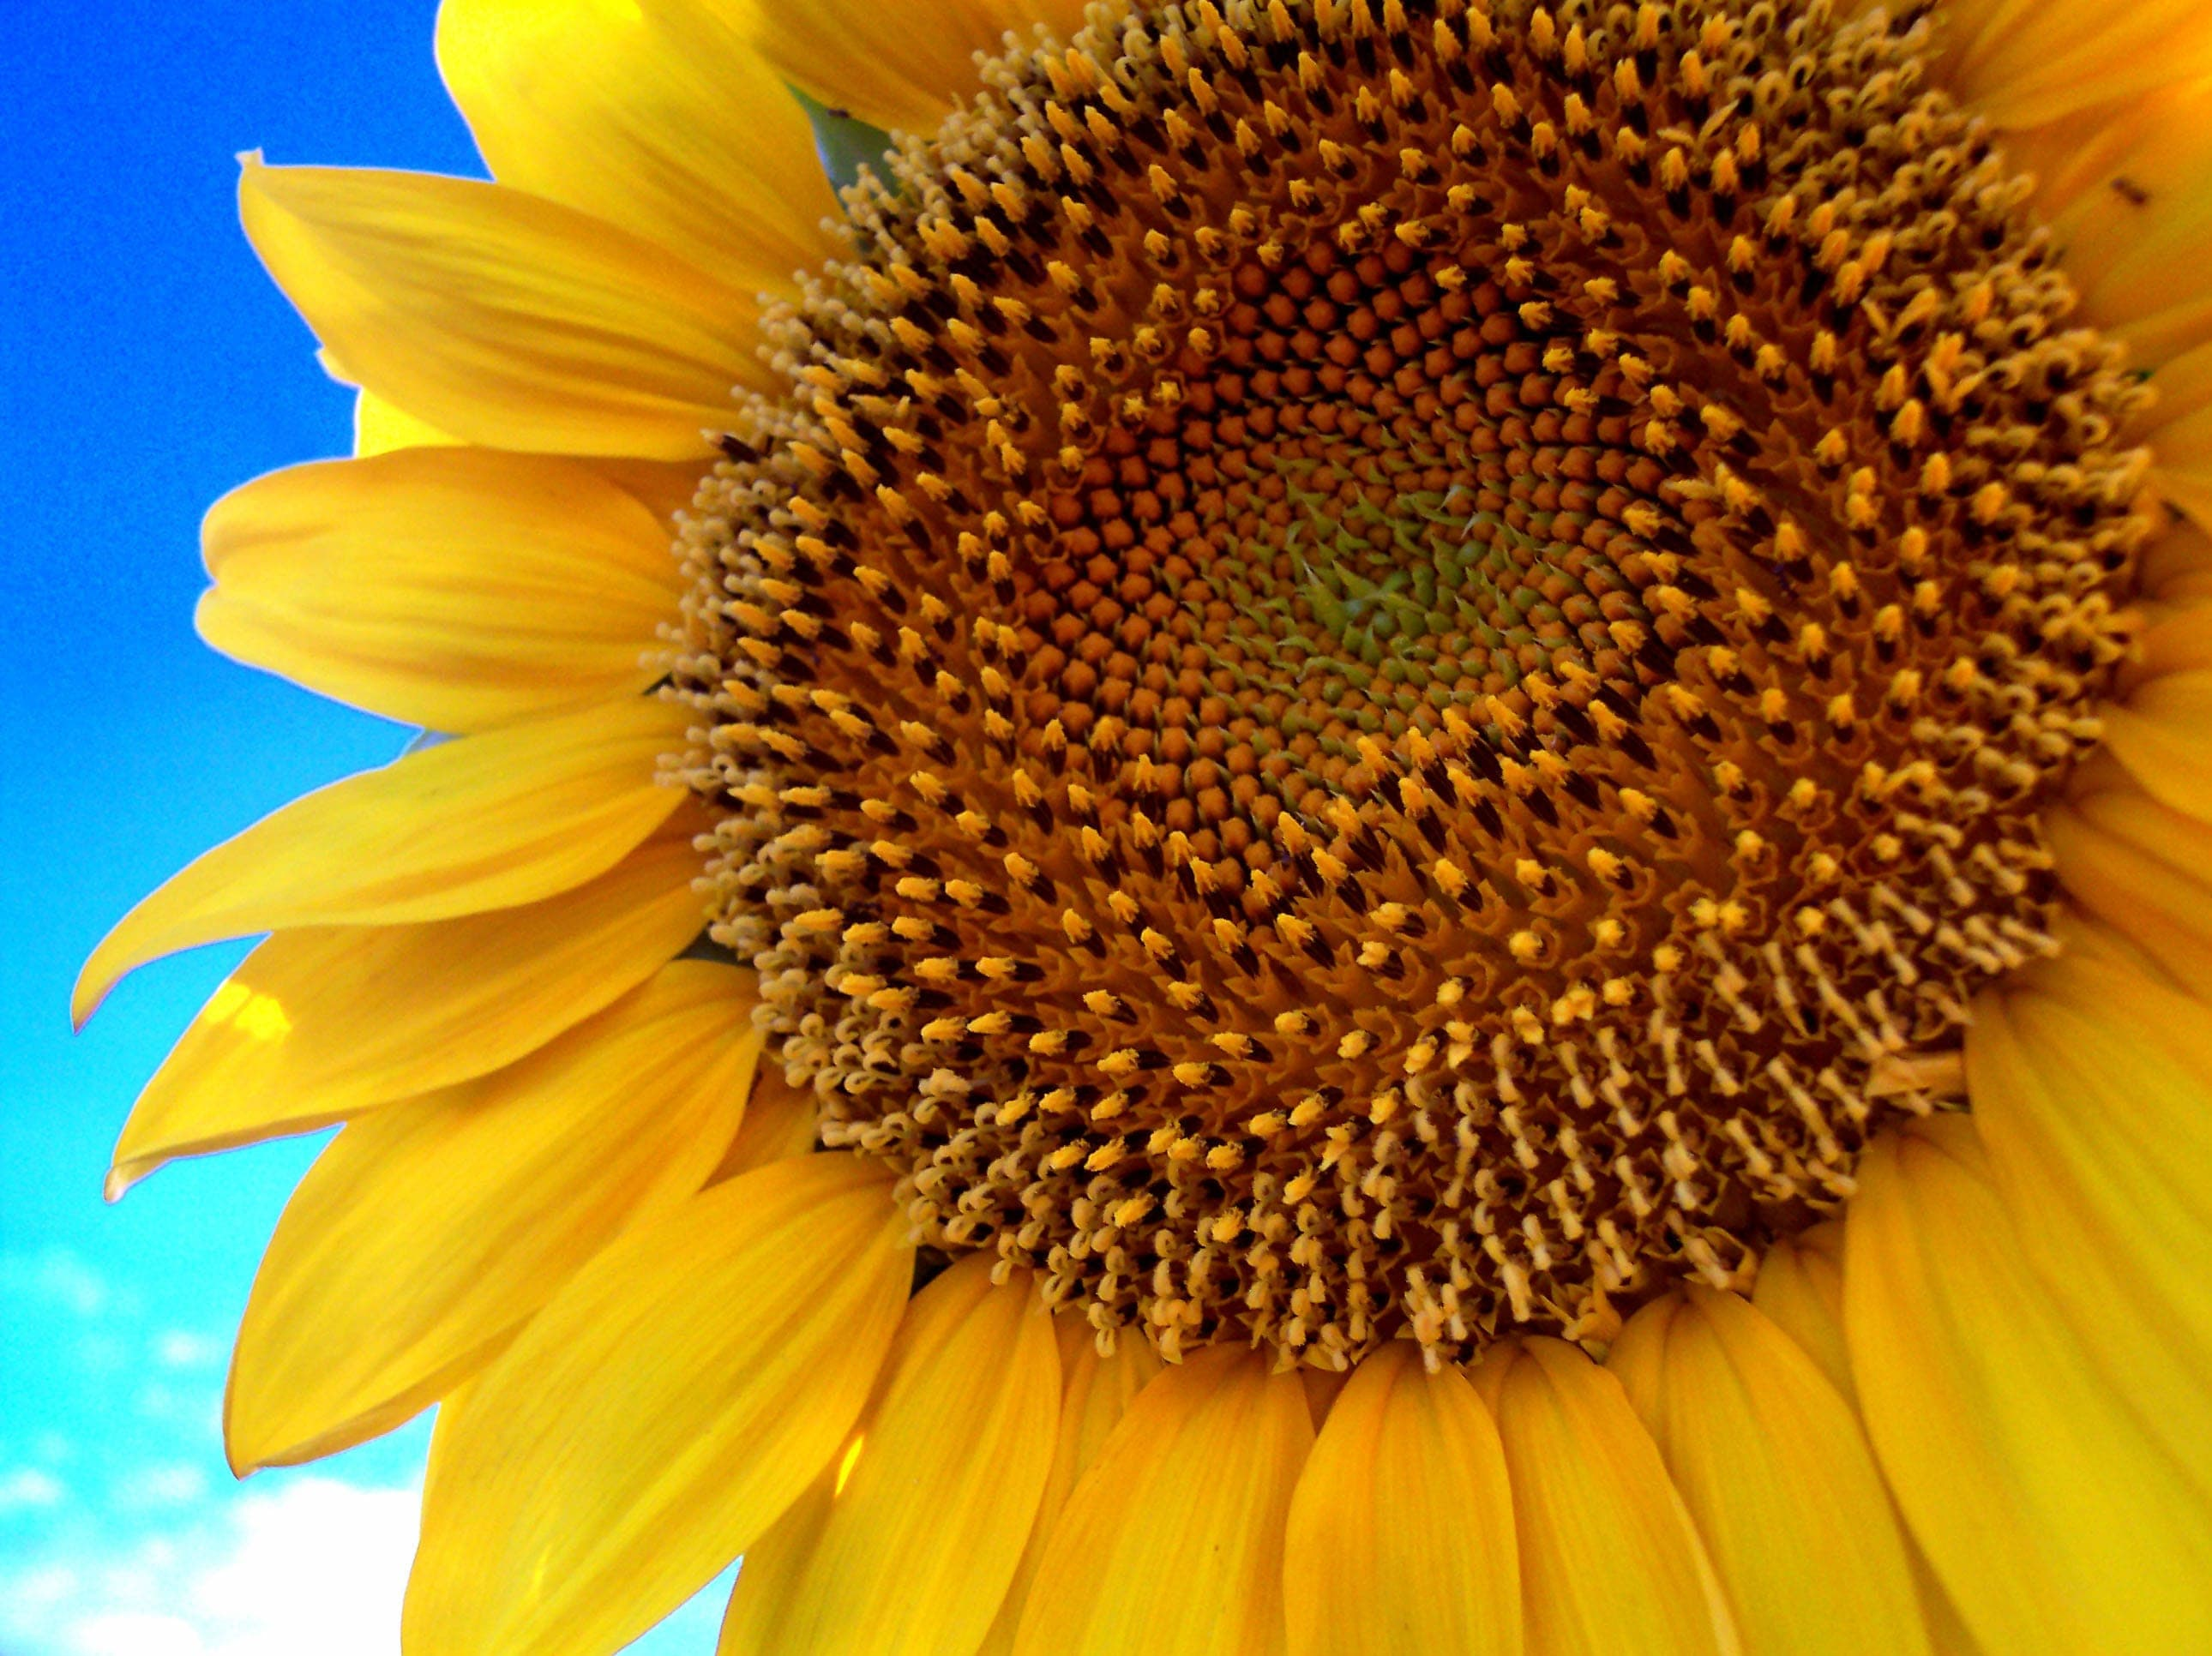

In [27]:
url = "https://robinasbell.com/wp-content/uploads/2012/03/sunflower.jpg"

print("Downloading image from:", url)
urlfile = requests.get(url, allow_redirects = True)
savedimage = 'flowers-images/test/download.jpg'
open(savedimage, 'wb').write(urlfile.content)

from IPython.display import Image
Image(filename = savedimage, width = 640, height = 480)

In [28]:
label, conf_score = flowers_model(savedimage)


Predicting the image ...

Image file: flowers-images/test/download.jpg 

{'filename': '/tmp/tmpof4nxu05/tmp54k0cibu', 'probs': [0.0002873223274946213, 0.00033003330463543534, 0.00013827867223881185, 0.9990795850753784, 0.00016483083891216666], 'labels': ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']}

>> This flower is from the SUNFLOWERS family with a confidence = 99.91 %

------------------------------------
Response status code: 200
Elapsed: 0:00:00.271452
Full process done in 0.313154 second


In [29]:
label, conf_score

('sunflowers', 0.9990795850753784)

Image saved in: flowers-images/test/predicted_test (3).jpg


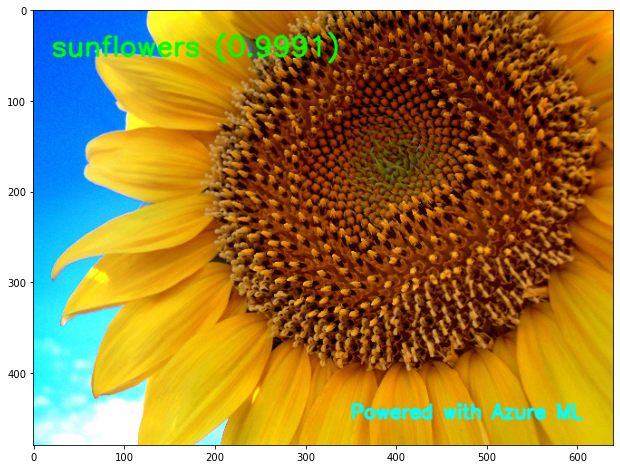

In [30]:
labelled_image(savedimage)